# Naive Bayes Classifier - Gaussian Naive Bayes

# Bank Marketing Dataset Plus
- age	年龄
- job	职业：admin, unknown, unemployed, management…
- marital	婚姻：married, divorced, single
- default	信用卡是否有违约: yes or no
- housing	是否有房贷: yes or no
- contact	联系方式：unknown, telephone, cellular
- month	上一次联系的月份：jan, feb, mar, …
- day_of_week	上一次联系的星期几：mon, tue, wed, thu, fri
- duration	上一次联系的时长（秒）
- campaign	活动期间联系客户的次数
- pdays	上一次与客户联系后的间隔天数
- previous	在本次营销活动前，与客户联系的次数
- poutcome	之前营销活动的结果：unknown, other, failure, success
- emp_var_rate	就业变动率（季度指标）
- cons_price_index	消费者价格指数（月度指标）
- cons_conf_index	消费者信心指数（月度指标）
- lending_rate3m	银行同业拆借率 3个月利率（每日指标）
- nr_employed	雇员人数（季度指标）
- subscribe	客户是否进行购买：yes 或 no

In [1]:
# Import libararies for data management
import numpy as np
import pandas as pd


In [2]:
# Load dataset
data = pd.read_csv('processed_train_filled.csv')

In [3]:
data.head()

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_index,cons_conf_index,lending_rate3m,nr_employed,subscribe
0,1,51,admin.,divorced,professional.course,no,yes,yes,cellular,aug,...,1,112,2,failure,1.4,90.81,-35.53,0.69,5219.74,no
1,2,50,services,married,high.school,no,yes,no,cellular,may,...,1,412,2,nonexistent,-1.8,96.33,-40.58,4.05,4974.79,yes
2,3,48,blue-collar,divorced,basic.9y,no,no,no,cellular,apr,...,0,1027,1,failure,-1.8,96.33,-44.74,1.50,5022.61,no
3,4,26,entrepreneur,single,high.school,yes,yes,yes,cellular,aug,...,26,998,0,nonexistent,1.4,97.08,-35.55,5.11,5222.87,yes
4,5,45,admin.,single,university.degree,no,no,no,cellular,nov,...,1,240,4,success,-3.4,89.82,-33.83,1.17,4884.70,no


In [4]:
data = data.drop(['emp_var_rate', 'cons_price_index', 'cons_conf_index', 'lending_rate3m', 'nr_employed'], axis=1)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22500 entries, 0 to 22499
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           22500 non-null  int64 
 1   age          22500 non-null  int64 
 2   job          22500 non-null  object
 3   marital      22500 non-null  object
 4   education    22500 non-null  object
 5   default      22500 non-null  object
 6   housing      22500 non-null  object
 7   loan         22500 non-null  object
 8   contact      22500 non-null  object
 9   month        22500 non-null  object
 10  day_of_week  22500 non-null  object
 11  duration     22500 non-null  int64 
 12  campaign     22500 non-null  int64 
 13  pdays        22500 non-null  int64 
 14  previous     22500 non-null  int64 
 15  poutcome     22500 non-null  object
 16  subscribe    22500 non-null  object
dtypes: int64(6), object(11)
memory usage: 2.9+ MB


In [6]:
data.shape

(22500, 17)

# Data Pre-processing

In [16]:
#准备对数值型自变量进行标准化
numeric_X = data[['age','duration','campaign','pdays','previous']]
category_X_y = data[['job', 'marital', 'education', 'housing', 'loan', 'default', 'contact', 'month', 'day_of_week', 'poutcome', 'subscribe']]

from sklearn import preprocessing
norm_X = numeric_X.apply(preprocessing.scale, axis=0)

In [18]:
# 把标准化完的变量重新组合回来

data = pd.concat([norm_X, category_X_y], axis=1)
data.head()

,age,duration,campaign,pdays,previous,job,marital,education,housing,loan,default,contact,month,day_of_week,poutcome,subscribe
0,0.876440,2.425786,-0.327368,-2.024892,0.356261,admin.,divorced,professional.course,yes,yes,no,cellular,aug,mon,failure,no
1,0.793699,2.491410,-0.327368,-1.107256,0.356261,services,married,high.school,yes,no,no,cellular,may,mon,nonexistent,yes
2,0.628215,-0.680888,-0.465802,0.773898,-0.164927,blue-collar,divorced,basic.9y,no,no,no,cellular,apr,wed,failure,no
3,-1.192102,-0.549639,3.133474,0.685193,-0.686116,entrepreneur,single,high.school,yes,yes,yes,cellular,aug,fri,nonexistent,yes
4,0.379990,1.418386,-0.327368,-1.633367,1.398639,admin.,single,university.degree,no,no,no,cellular,nov,tue,success,no


In [19]:
datanew = pd.get_dummies(data, columns=['job', 'marital', 'education', 'housing', 'loan', 'default', 'contact', 'month', 'day_of_week', 'poutcome', 'subscribe'])
datanew.head()

,age,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribe_no,subscribe_yes
0,0.876440,2.425786,-0.327368,-2.024892,0.356261,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0.793699,2.491410,-0.327368,-1.107256,0.356261,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
2,0.628215,-0.680888,-0.465802,0.773898,-0.164927,0,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0
3,-1.192102,-0.549639,3.133474,0.685193,-0.686116,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,1
4,0.379990,1.418386,-0.327368,-1.633367,1.398639,1,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0


In [20]:
datanew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22500 entries, 0 to 22499
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            22500 non-null  float64
 1   duration                       22500 non-null  float64
 2   campaign                       22500 non-null  float64
 3   pdays                          22500 non-null  float64
 4   previous                       22500 non-null  float64
 5   job_admin.                     22500 non-null  uint8  
 6   job_blue-collar                22500 non-null  uint8  
 7   job_entrepreneur               22500 non-null  uint8  
 8   job_housemaid                  22500 non-null  uint8  
 9   job_management                 22500 non-null  uint8  
 10  job_retired                    22500 non-null  uint8  
 11  job_self-employed              22500 non-null  uint8  
 12  job_services                   22500 non-null 

In [21]:
datanew.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes', 'default_no', 'default_yes', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success', 'subscribe_n

In [24]:
# define features 
features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes', 'default_no', 'default_yes', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success']
X = datanew[features]
X

,age,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.876440,2.425786,-0.327368,-2.024892,0.356261,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0.793699,2.491410,-0.327368,-1.107256,0.356261,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.628215,-0.680888,-0.465802,0.773898,-0.164927,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,-1.192102,-0.549639,3.133474,0.685193,-0.686116,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.379990,1.418386,-0.327368,-1.633367,1.398639,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,-0.612910,2.013890,-0.050501,0.461901,0.877450,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
22496,-0.530168,1.423273,1.472270,-0.737143,0.877450,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
22497,-1.274843,0.849411,-0.465802,0.055083,1.919828,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
22498,1.372890,-0.398146,0.226367,0.657664,-0.686116,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [25]:
#users profile only as X2
features2 = ['age', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes', 'default_no', 'default_yes', 'contact_cellular',
       'contact_telephone']
X2 = datanew[features2]
X2

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,education_professional.course,education_university.degree,housing_no,housing_yes,loan_no,loan_yes,default_no,default_yes,contact_cellular,contact_telephone
0,0.876440,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
1,0.793699,0,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,1,0,1,0
2,0.628215,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
3,-1.192102,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,1,0
4,0.379990,1,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,-0.612910,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
22496,-0.530168,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,1,0
22497,-1.274843,1,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
22498,1.372890,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,1,0,0,1


In [27]:
#previous campaign details only as X3
features3 = ['contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success']
X3 = datanew[features3]
X3

,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,...,day_of_week_thu,day_of_week_tue,day_of_week_wed,duration,campaign,pdays,previous,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,2.425786,-0.327368,-2.024892,0.356261,1,0,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,2.491410,-0.327368,-1.107256,0.356261,0,1,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,1,-0.680888,-0.465802,0.773898,-0.164927,1,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,-0.549639,3.133474,0.685193,-0.686116,0,1,0
4,1,0,0,0,0,0,0,0,0,1,...,0,1,0,1.418386,-0.327368,-1.633367,1.398639,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,1,0,0,1,0,0,0,0,0,0,...,0,0,0,2.013890,-0.050501,0.461901,0.877450,1,0,0
22496,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1.423273,1.472270,-0.737143,0.877450,1,0,0
22497,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0.849411,-0.465802,0.055083,1.919828,0,0,1
22498,0,1,0,0,0,0,0,0,1,0,...,0,1,0,-0.398146,0.226367,0.657664,-0.686116,0,1,0


In [83]:
# define target
y = datanew['subscribe_yes']

In [84]:
y.value_counts()

0    19548
1     2952
Name: subscribe_yes, dtype: int64

In [85]:
# ! pip install imblearn scikit-learn==1.1.0

In [86]:
# ! pip install imblearn

In [87]:
from imblearn.over_sampling import SMOTE

In [88]:
# transform the datas into balanced data
oversample = SMOTE(random_state=123)
X_new, y_new = oversample.fit_resample(X, y)
X2_new, y2_new = oversample.fit_resample(X2, y)
X3_new, y3_new = oversample.fit_resample(X3, y)

In [89]:
y_new.value_counts()

0    19548
1    19548
Name: subscribe_yes, dtype: int64

In [90]:
y2_new.value_counts()

0    19548
1    19548
Name: subscribe_yes, dtype: int64

In [91]:
y3_new.value_counts()

0    19548
1    19548
Name: subscribe_yes, dtype: int64

In [92]:
# import multinomial naive bayes model from sklearn
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

from sklearn.naive_bayes import GaussianNB

In [93]:
# define a Gaussian bayes classifier
# alpha:smoothing parameter, by default=1.0
GNB = GaussianNB()

In [94]:
# import cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict

In [95]:
#predict target based on cross validation
y_pred_cv = cross_val_predict(GNB,X_new,y_new,cv=10)
y_pred_cv

array([0, 0, 0, ..., 0, 1, 1], dtype=uint8)

In [96]:
Accuracy = cross_val_score(GNB,X_new,y_new,cv=10).mean()
Accuracy

0.7165702598567539

In [97]:
#prediction based on user profiles 
y2_pred_cv = cross_val_predict(GNB,X2_new,y2_new,cv=10)
y2_pred_cv

array([0, 0, 0, ..., 0, 1, 1], dtype=uint8)

In [98]:
Accuracy2 = cross_val_score(GNB,X2_new,y2_new,cv=10).mean()
Accuracy2

0.6004193549020261

In [99]:
#prediction based on previous campaign info
y3_pred_cv = cross_val_predict(GNB,X3_new,y3_new,cv=10)
y3_pred_cv

array([0, 0, 1, ..., 0, 0, 1], dtype=uint8)

In [100]:
Accuracy3 = cross_val_score(GNB,X3_new,y3_new,cv=10).mean()
Accuracy3

0.6220062037962104

In [101]:
# 使用isotonic和sigmoid两种校准方式提高GaussianNB的预测准确率
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay


In [102]:
GNB_isotonic = CalibratedClassifierCV(GNB, cv=10, method='isotonic')
GNB_sigmoid = CalibratedClassifierCV(GNB, cv=10, method='sigmoid')

In [103]:
GNB_list = [
(GNB, 'Naive Bayes'),
(GNB_isotonic, 'Naive Bayes + Isotonic'),
(GNB_sigmoid, 'Naive Bayes + Sigmoid'),
]

In [104]:
y_pred2_cv = cross_val_predict(GNB_isotonic,X_new,y_new,cv=10)
y_pred2_cv

array([0, 0, 0, ..., 1, 1, 1], dtype=uint8)

In [105]:
Accuracy1_2 = cross_val_score(GNB_isotonic,X_new,y_new,cv=10).mean()
Accuracy1_2

0.7557055493290781

In [106]:
y2_pred2_cv = cross_val_predict(GNB_isotonic,X2_new,y2_new,cv=10)
y2_pred2_cv

array([1, 0, 0, ..., 1, 1, 1], dtype=uint8)

In [107]:
Accuracy2_2 = cross_val_score(GNB_isotonic,X2_new,y2_new,cv=10).mean()
Accuracy2_2

0.6519595608272338

In [108]:
y3_pred2_cv = cross_val_predict(GNB_isotonic,X3_new,y3_new,cv=10)
y3_pred2_cv

array([1, 0, 1, ..., 1, 1, 1], dtype=uint8)

In [109]:
Accuracy3_2 = cross_val_score(GNB_isotonic,X3_new,y3_new,cv=10).mean()
Accuracy3_2

0.6867194336108096

In [110]:
y_pred3_cv = cross_val_predict(GNB_sigmoid,X_new,y_new,cv=10)
y_pred3_cv

array([0, 0, 0, ..., 1, 1, 1], dtype=uint8)

In [111]:
Accuracy1_3 = cross_val_score(GNB_sigmoid,X_new,y_new,cv=10).mean()
Accuracy1_3

0.7325058377316692

In [112]:
y2_pred3_cv = cross_val_predict(GNB_sigmoid,X2_new,y2_new,cv=10)
y2_pred3_cv

array([1, 0, 0, ..., 1, 1, 1], dtype=uint8)

In [113]:
Accuracy2_3 = cross_val_score(GNB_sigmoid,X2_new,y2_new,cv=10).mean()
Accuracy2_3

0.6337733566515464

In [114]:
y3_pred3_cv = cross_val_predict(GNB_sigmoid,X3_new,y3_new,cv=10)
y3_pred3_cv

array([0, 0, 1, ..., 0, 1, 1], dtype=uint8)

In [115]:
Accuracy3_3 = cross_val_score(GNB_sigmoid,X3_new,y3_new,cv=10).mean()
Accuracy3_3

0.6562815628436967

# ROC Curve & Calibration Curve

In [116]:
# probablities for each prediction
proba_y = cross_val_predict(GNB, X_new, y_new, cv=10, method='predict_proba')

In [117]:
proba_y

array([[9.98089502e-01, 1.91049834e-03],
       [9.99999331e-01, 6.69153878e-07],
       [9.99978830e-01, 2.11699634e-05],
       ...,
       [5.79034477e-01, 4.20965523e-01],
       [1.30382091e-03, 9.98696179e-01],
       [7.74029663e-67, 1.00000000e+00]])

In [118]:
# get the column of probabilities being 1
proba_y_1 = proba_y[:,1]
proba_y_1

array([1.91049834e-03, 6.69153878e-07, 2.11699634e-05, ...,
       4.20965523e-01, 9.98696179e-01, 1.00000000e+00])

In [119]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
# get fpr, tpr and thresholds

fpr, tpr, thresholds = metrics.roc_curve(y_new, proba_y_1, pos_label=1)

In [120]:
# help(roc_curve)

In [121]:
tpr

array([0.        , 0.12297933, 0.1231328 , ..., 0.99994884, 1.        ,
       1.        ])

In [122]:
fpr

array([0.        , 0.02429916, 0.02429916, ..., 0.99994884, 0.99994884,
       1.        ])

In [123]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       4.98793926e-25, 2.81867113e-26, 8.86955652e-27])

In [124]:
# plot roc curve
import matplotlib as mpl
import matplotlib.pyplot as plt

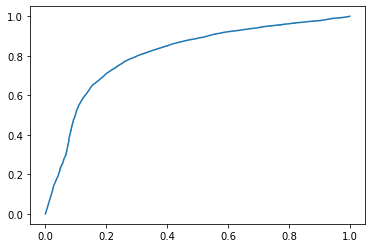

In [125]:
plt.plot(fpr,tpr)
plt.show()

In [126]:
# auc (area under ROC curve)
metrics.auc(fpr, tpr)

0.8078639994068527

In [127]:
# Calibration Curve概率校准曲线绘制
from sklearn.calibration import calibration_curve

In [128]:
fraction_of_positives, mean_predicted_value = calibration_curve(y_new, proba_y_1, n_bins=10)

In [129]:
fraction_of_positives

array([0.28275923, 0.61630695, 0.67581301, 0.72268908, 0.74769797,
       0.79824561, 0.83404255, 0.82578875, 0.86991063, 0.83354063])

In [130]:
mean_predicted_value

array([0.00873983, 0.14523675, 0.24652908, 0.34714955, 0.45076705,
       0.55171448, 0.64924334, 0.75353086, 0.85374212, 0.99036416])

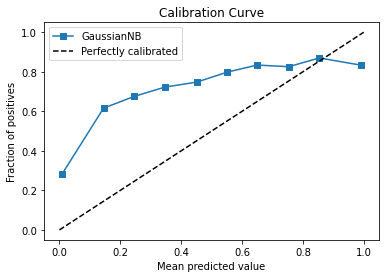

In [131]:
plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="GaussianNB")
plt.plot([0, 1], [0, 1], "k--", label="Perfectly calibrated")
plt.xlabel("Mean predicted value")
plt.ylabel("Fraction of positives")
plt.title('Calibration Curve')
plt.legend()
plt.show()

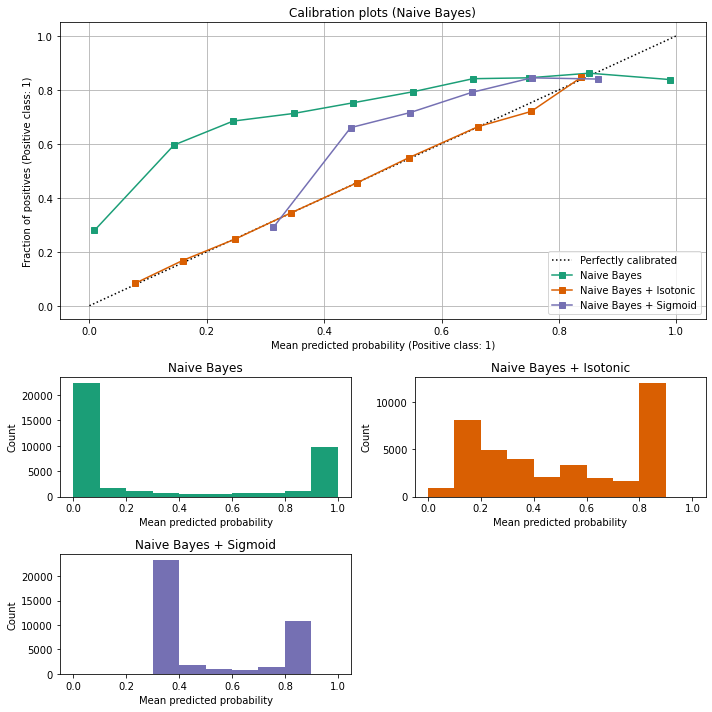

In [132]:
# 加入isotonic和sigmoid绘制曲线
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10,10))
gs = GridSpec(4,2)
colors = plt.get_cmap('Dark2')

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (gnb, name) in enumerate(GNB_list):
    gnb.fit(X_new, y_new)
    display = CalibrationDisplay.from_estimator(
        gnb, 
        X_new, 
        y_new, 
        n_bins=10, 
        name=name, 
        ax=ax_calibration_curve, 
        color=colors(i)
    )
    calibration_displays[name] = display
    
ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots (Naive Bayes)")

#Add histogram
grid_positions = [(2,0), (2,1), (3,0)]
for i, (_, name) in enumerate(GNB_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])
    
    ax.hist(
        calibration_displays[name].y_prob,
        range=(0,1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel='Mean predicted probability', ylabel='Count')
    
plt.tight_layout()
plt.show()

In [133]:
from collections import defaultdict


from sklearn.metrics import (
    brier_score_loss,
    f1_score,
    log_loss,
    precision_score,
    recall_score,
    roc_auc_score,
)

scores = defaultdict(list)
for i, (gnb, name) in enumerate(GNB_list):
    gnb.fit(X_new, y_new)
    y_prob = gnb.predict_proba(X_new)
    y_pred = gnb.predict(X_new)
    scores["Classifier"].append(name)

    for metric in [brier_score_loss, log_loss, roc_auc_score]:
        score_name = metric.__name__.replace("_", " ").replace("score", "").capitalize()
        scores[score_name].append(metric(y_new, y_prob[:, 1]))

    for metric in [precision_score, recall_score, f1_score]:
        score_name = metric.__name__.replace("_", " ").replace("score", "").capitalize()
        scores[score_name].append(metric(y_new, y_pred))

    score_df = pd.DataFrame(scores).set_index("Classifier")
    score_df.round(decimals=3)

score_df

,Brier loss,Log loss,Roc auc,Precision,Recall,F1
Classifier,,,,,,
Naive Bayes,0.246428,2.304917,0.811282,0.838596,0.547524,0.662499
Naive Bayes + Isotonic,0.171571,0.522382,0.813786,0.763947,0.745345,0.754531
Naive Bayes + Sigmoid,0.185600,0.556246,0.812158,0.828531,0.594230,0.692088
